# Exploratory Data Analysis

## 1. NAV Trend Over Time (Top 5 Funds)

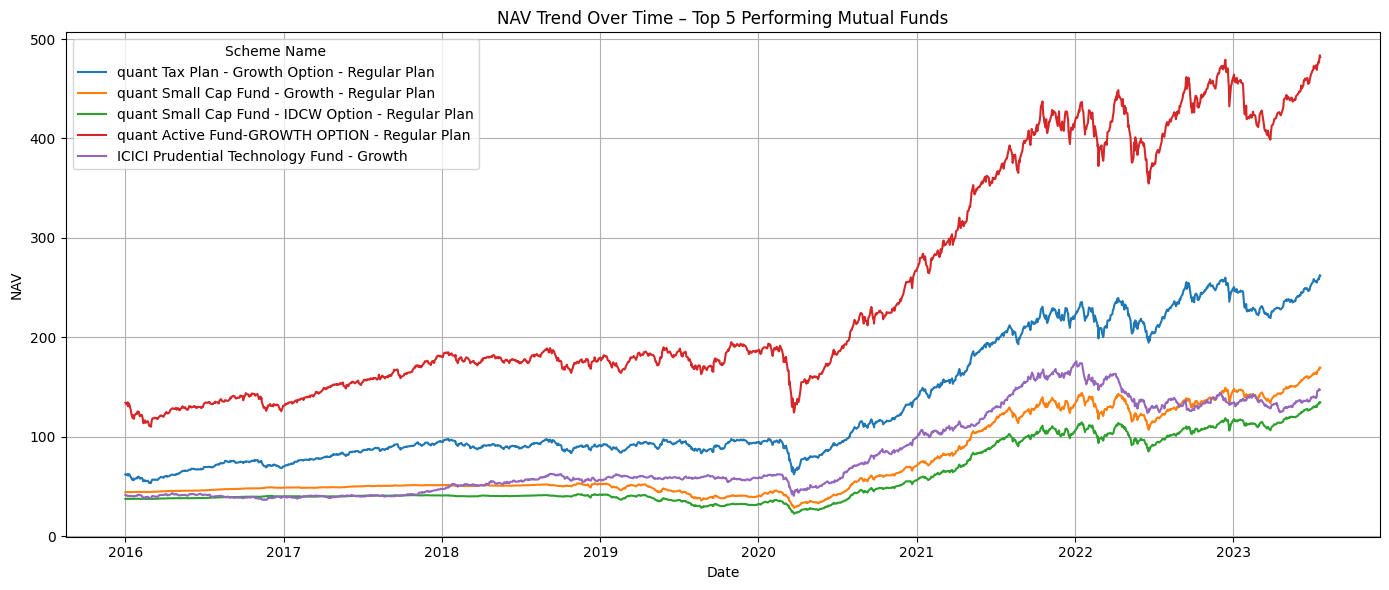

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv(r"C:/Users/BALA/OneDrive - University of Hertfordshire/Desktop/final project/app/data/processed/preprocessed_mutual_funds.csv")

# Convert 'Date' column to datetime if needed
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Get top 5 Scheme_Codes by CAGR (excluding NaNs)
top_schemes = df.dropna(subset=['CAGR']).groupby('Scheme_Code').first().sort_values(by='CAGR', ascending=False).head(5).index

# Filter for these top 5 schemes
top_df = df[df['Scheme_Code'].isin(top_schemes)]

# Plot NAV over time
plt.figure(figsize=(14, 6))
for code in top_schemes:
    scheme_data = top_df[top_df['Scheme_Code'] == code]
    plt.plot(scheme_data['Date'], scheme_data['NAV'], label=scheme_data['Scheme_Name'].iloc[0][:50])

plt.title('NAV Trend Over Time – Top 5 Performing Mutual Funds')
plt.xlabel('Date')
plt.ylabel('NAV')
plt.legend(title="Scheme Name", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## 2. Fund Category Distribution (Bar Plot)

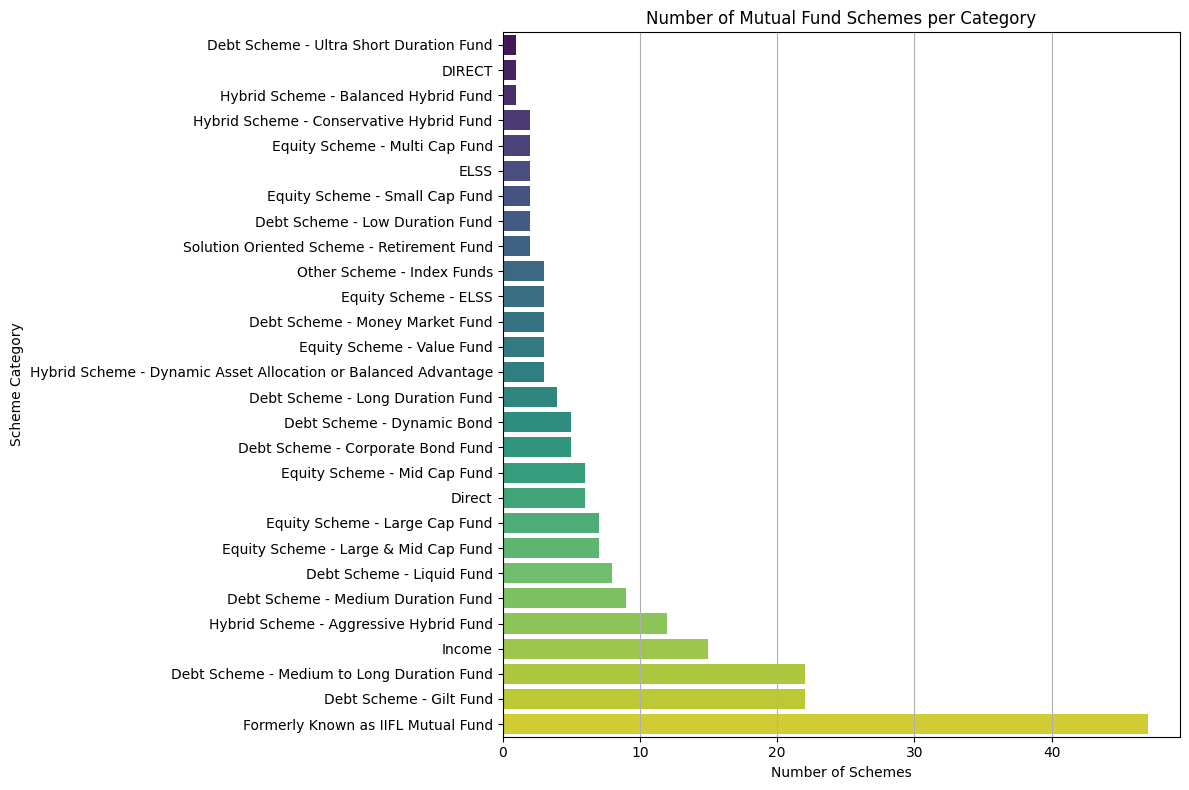

In [5]:
import seaborn as sns

# Count of schemes by category
category_counts = df[['Scheme_Code', 'Scheme_Category']].drop_duplicates().Scheme_Category.value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(y=category_counts.index, x=category_counts.values, hue=category_counts.index, palette="viridis", dodge=False, legend=False)
plt.title("Number of Mutual Fund Schemes per Category")
plt.xlabel("Number of Schemes")
plt.ylabel("Scheme Category")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


## 3. Risk vs Return (CAGR vs Volatility)
### Which funds give high return with low risk?

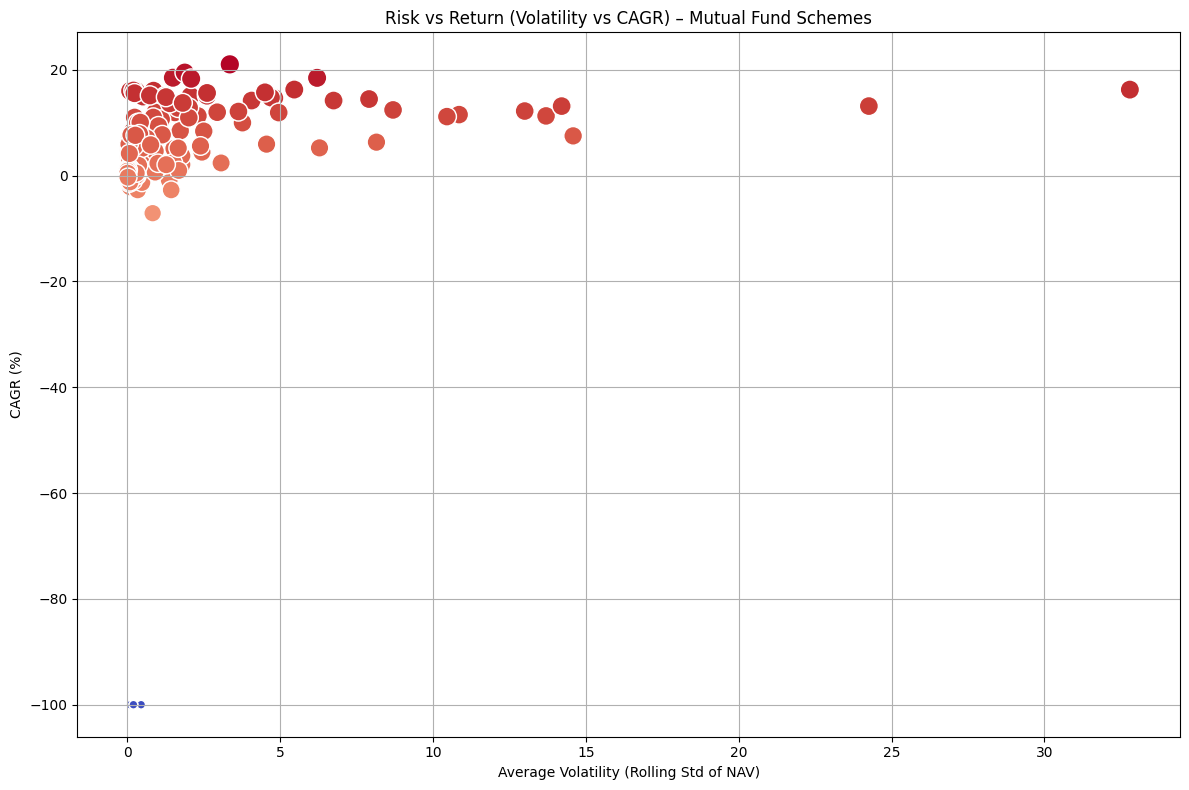

In [6]:
# Calculate risk and return per Scheme_Code
risk_return_df = df.groupby('Scheme_Code').agg({
    'Rolling_Std_NAV': 'mean',
    'CAGR': 'first',  # Same CAGR for all rows within a scheme
    'Scheme_Name': 'first'
}).dropna()

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=risk_return_df, x='Rolling_Std_NAV', y='CAGR', hue='CAGR', palette='coolwarm', size='CAGR', sizes=(40, 200), legend=False)
plt.title("Risk vs Return (Volatility vs CAGR) – Mutual Fund Schemes")
plt.xlabel("Average Volatility (Rolling Std of NAV)")
plt.ylabel("CAGR (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 4. Heatmap of Top Mutual Funds (NAV, Volatility, CAGR)

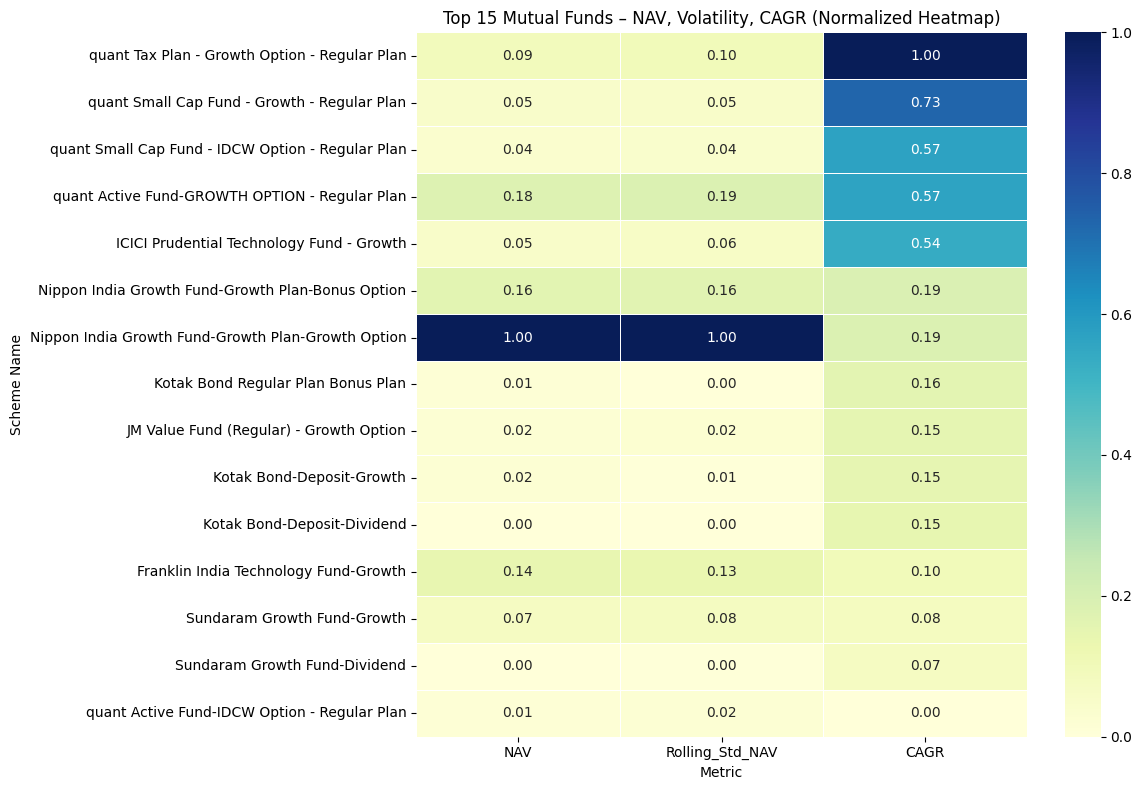

In [7]:
# Prepare heatmap data: top 15 funds by CAGR
heatmap_df = df.groupby('Scheme_Code').agg({
    'NAV': 'mean',
    'Rolling_Std_NAV': 'mean',
    'CAGR': 'first',
    'Scheme_Name': 'first'
}).dropna()

# Get top 15 by CAGR
top_15_heatmap = heatmap_df.sort_values(by='CAGR', ascending=False).head(15)

# Set Scheme_Name as index
heatmap_data = top_15_heatmap.set_index('Scheme_Name')[['NAV', 'Rolling_Std_NAV', 'CAGR']]

# Normalize the data for better heatmap contrast
heatmap_norm = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_norm, annot=True, cmap='YlGnBu', cbar=True, linewidths=0.5, fmt=".2f")
plt.title("Top 15 Mutual Funds – NAV, Volatility, CAGR (Normalized Heatmap)")
plt.xlabel("Metric")
plt.ylabel("Scheme Name")
plt.tight_layout()
plt.show()


In [8]:
# Identify top 3 Scheme_Codes by record count
top_scheme_codes = df['Scheme_Code'].value_counts().head(3).index.tolist()

# Display the selected Scheme Codes
top_scheme_codes

[100051, 100047, 100048]